In [1]:
import sys 
import os
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
from dotenv import load_dotenv
from scipy.stats import zscore
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scripts.load_from_postgres import fetch_data_from_postgres
from scripts.User_overview_analysis import TelecomDataAnalysis
warnings.filterwarnings(
    "ignore", category = FutureWarning

)

In [3]:
query = "SELECT * FROM"
table_name = 'xdr_data'
data = fetch_data_from_postgres(query, table_name)

Connection successful!


c:\Users\Ashis\Desktop\KAIM Program 2\week2\scripts\load_from_postgres.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(full_query, conn)


Data imported successfully!


In [4]:
analyzer = TelecomDataAnalysis(data)

Preprocessing data:
Missing values before handling:
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%) 

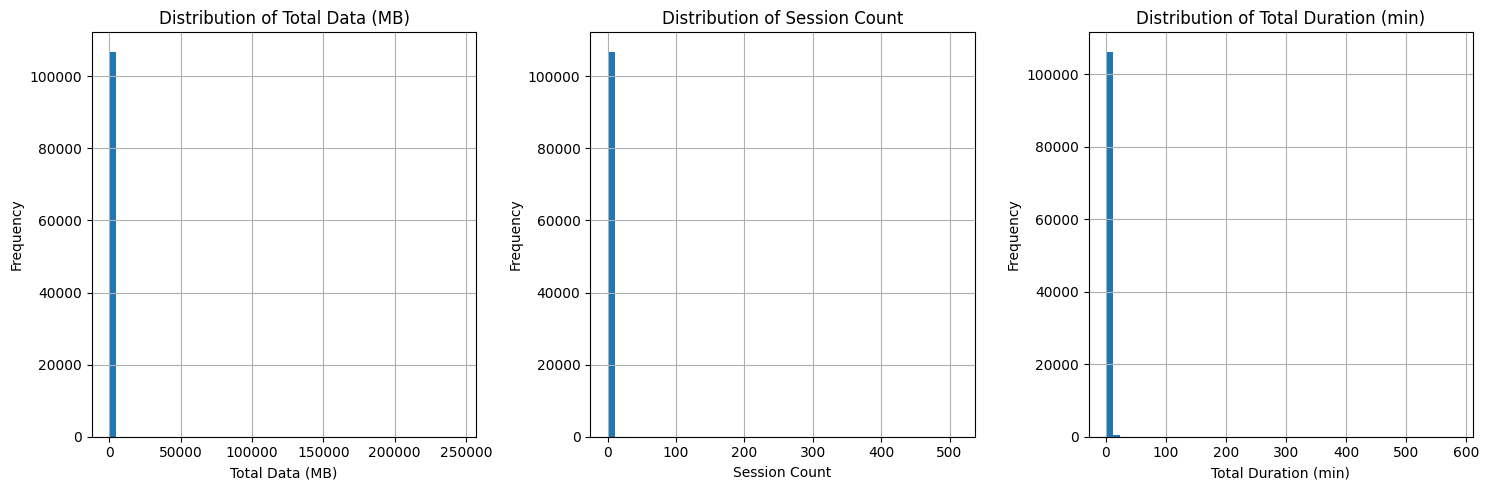


Analyzing app usage:
Application Usage Statistics:
Gaming DL (MB)          6.014524e+07
Other DL (MB)           6.001480e+07
Youtube DL (MB)         1.657727e+06
Netflix DL (MB)         1.656805e+06
Youtube UL (MB)         1.568949e+06
Netflix UL (MB)         1.567716e+06
Gaming UL (MB)          1.181299e+06
Other UL (MB)           1.177608e+06
Google DL (MB)          8.195921e+05
Google UL (MB)          2.930613e+05
Social Media DL (MB)    2.558347e+05
Email DL (MB)           2.553155e+05
Email UL (MB)           6.660750e+04
Social Media UL (MB)    4.691991e+03
dtype: float64


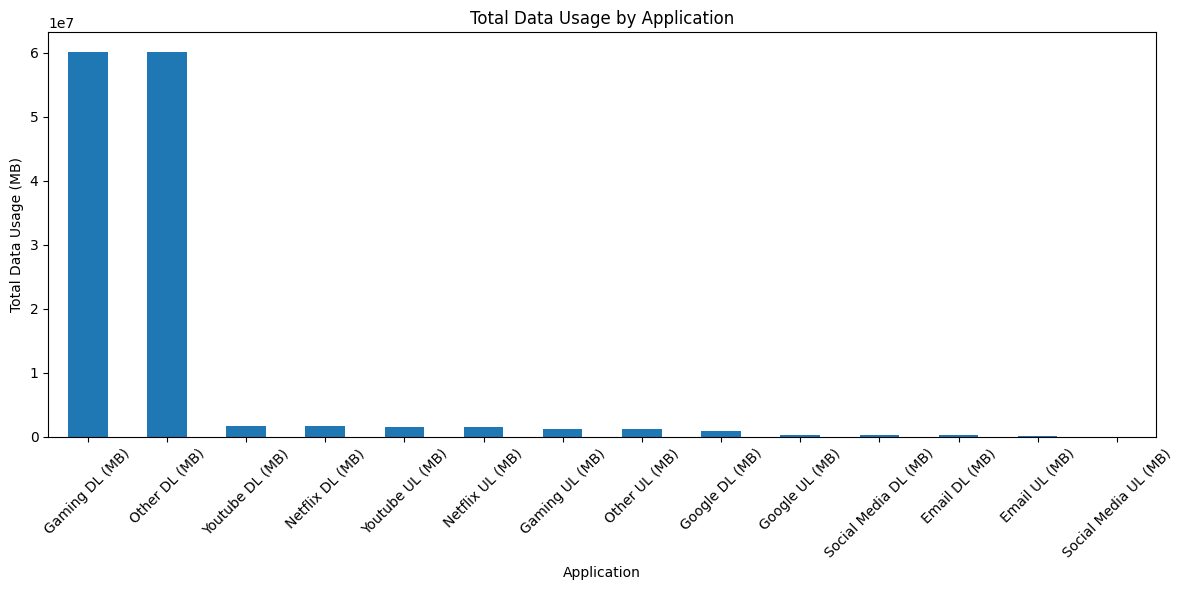


Performing PCA:
PCA Results:
Explained variance ratio: [0.90542785 0.07887772]


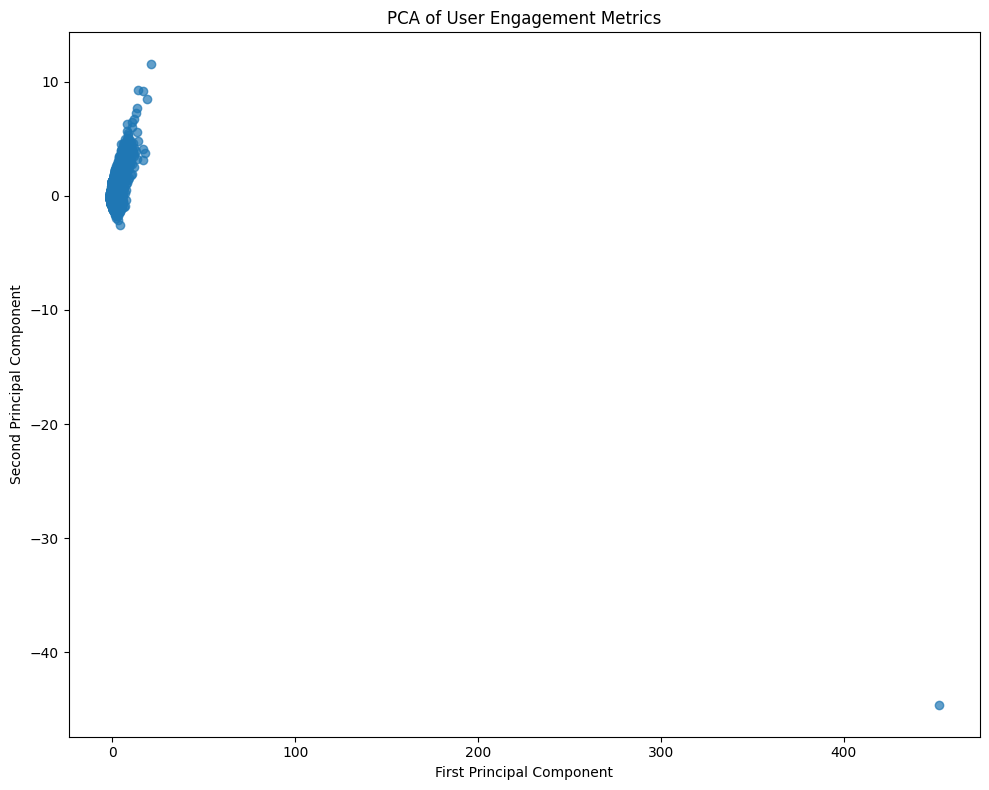


Top 10 Handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


Top 3 Manufacturers:


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Top Handsets per Manufacturer:

Apple:


Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Samsung:


Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Huawei:


Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


User Segmentation:


Decile
0    5.187263e+06
1    5.826395e+06
2    6.233693e+06
3    5.754800e+06
4    4.905475e+06
5    6.089914e+06
6    5.815260e+06
7    7.350877e+06
8    8.781851e+06
9    1.470489e+07
Name: Total Data (MB), dtype: float64


Basic Metrics:


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
count,1.489990e+05,149429.000000,149429.000000,149429.000000,1.494290e+05,1.494290e+05,1.494290e+05,149429.000000,149429.000000,149429.000000,...,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05,1.494290e+05
mean,1.013900e+19,499.192453,498.728092,98863.463304,2.082017e+14,3.369571e+10,4.847455e+13,72.397669,11.444036,11322.750765,...,1.100966e+07,1.162616e+07,1.100101e+07,4.220523e+08,8.289436e+06,4.211370e+08,8.263530e+06,4.112019e+07,4.546492e+08,4.957694e+08
std,2.893161e+18,288.617624,288.112456,60058.870794,1.338749e+09,8.183495e+09,2.241637e+13,119.428693,19.497283,18869.949491,...,6.345228e+06,6.724581e+06,6.359518e+06,2.439682e+08,4.782014e+06,2.432049e+08,4.768122e+06,1.125813e+07,2.441430e+08,2.443789e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.082001e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.324119e+06,7.114041e+06,2.895611e+07
25%,7.349883e+18,250.000000,251.000000,57678.000000,2.082014e+14,3.365099e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.518577e+06,5.778290e+06,5.474887e+06,2.105312e+08,4.130298e+06,2.102471e+08,4.146254e+06,3.322668e+07,2.431413e+08,2.845280e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366366e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.101329e+07,1.163991e+07,1.099593e+07,4.234474e+08,8.291227e+06,4.218431e+08,8.266894e+06,4.113606e+07,4.559038e+08,4.969190e+08
75%,1.304243e+19,749.000000,750.000000,128075.000000,2.082018e+14,3.368330e+10,8.611970e+13,62.000000,11.000000,16919.000000,...,1.651518e+07,1.746860e+07,1.650601e+07,6.331499e+08,1.243204e+07,6.317068e+08,1.238114e+07,4.902660e+07,6.656915e+08,7.064808e+08
max,1.318654e+19,999.000000,999.000000,347864.000000,2.082522e+14,3.197021e+12,9.900120e+13,1702.000000,245.000000,85279.000000,...,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08,9.526413e+08



Descriptive Statistics:


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb


Dispersion Parameters:


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
std,2.893161e+18,288.617624,288.112456,6.005887e+04,1.338749e+09,8.183495e+09,2.241637e+13,119.428693,19.497283,1.886995e+04,...,6.345228e+06,6.724581e+06,6.359518e+06,2.439682e+08,4.782014e+06,2.432049e+08,4.768122e+06,1.125813e+07,2.441430e+08,2.443789e+08
var,8.370378e+36,83300.132943,83008.787303,3.607068e+09,1.792248e+18,6.696959e+19,5.024937e+26,14263.212668,380.144059,3.560750e+08,...,4.026192e+13,4.521999e+13,4.044347e+13,5.952050e+16,2.286765e+13,5.914860e+16,2.273498e+13,1.267456e+14,5.960581e+16,5.972104e+16
skew,2.660285e-02,0.001049,-0.000927,1.144522e+00,5.486566e+00,3.865351e+02,1.071470e+00,7.152717,5.111647,1.761283e+00,...,-9.785896e-04,-2.204987e-03,-7.513235e-05,-3.718414e-03,-2.037191e-03,1.155448e-03,1.523812e-03,-2.623630e-03,-3.412111e-03,-2.726027e-03
kurt,-1.995165e+00,-1.197578,-1.199305,1.725718e+00,4.236060e+01,1.494159e+05,-7.118229e-01,65.258749,37.012197,2.276974e+00,...,-1.198307e+00,-1.205259e+00,-1.202878e+00,-1.203221e+00,-1.202454e+00,-1.196887e+00,-1.191549e+00,-3.434439e-01,-1.198282e+00,-1.192922e+00



Plotting Histograms:


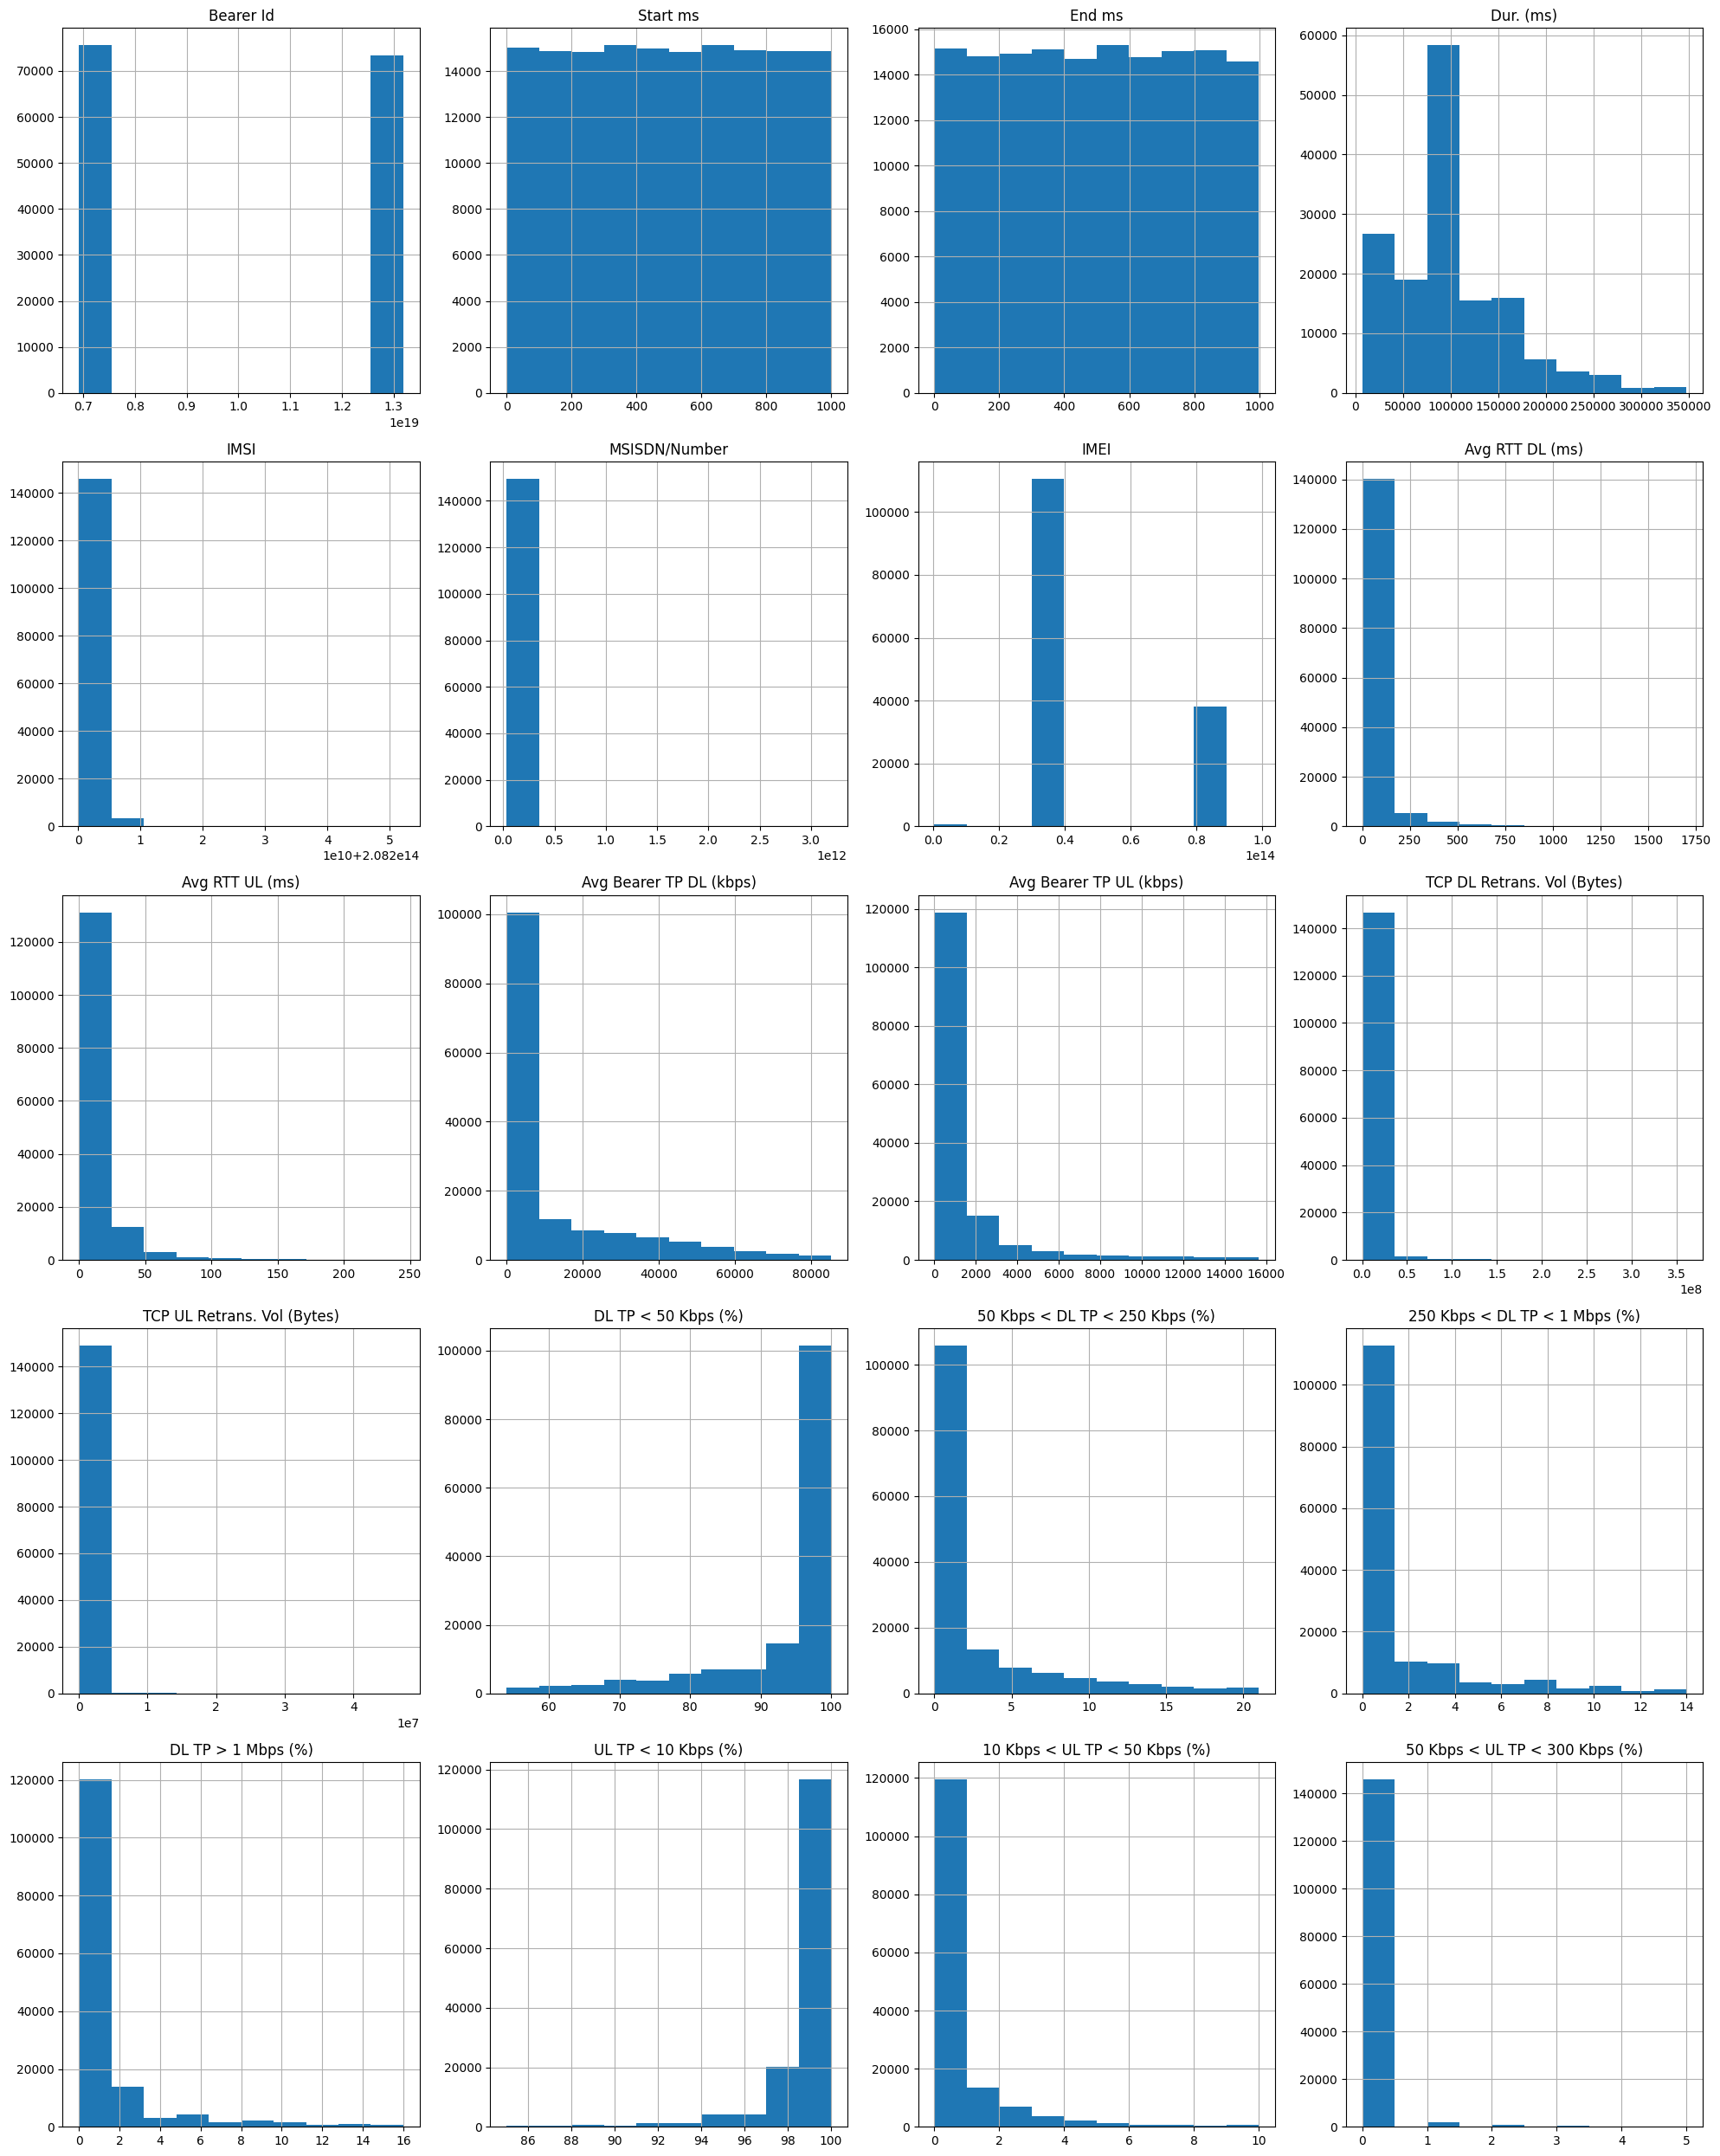


Bivariate Analysis:


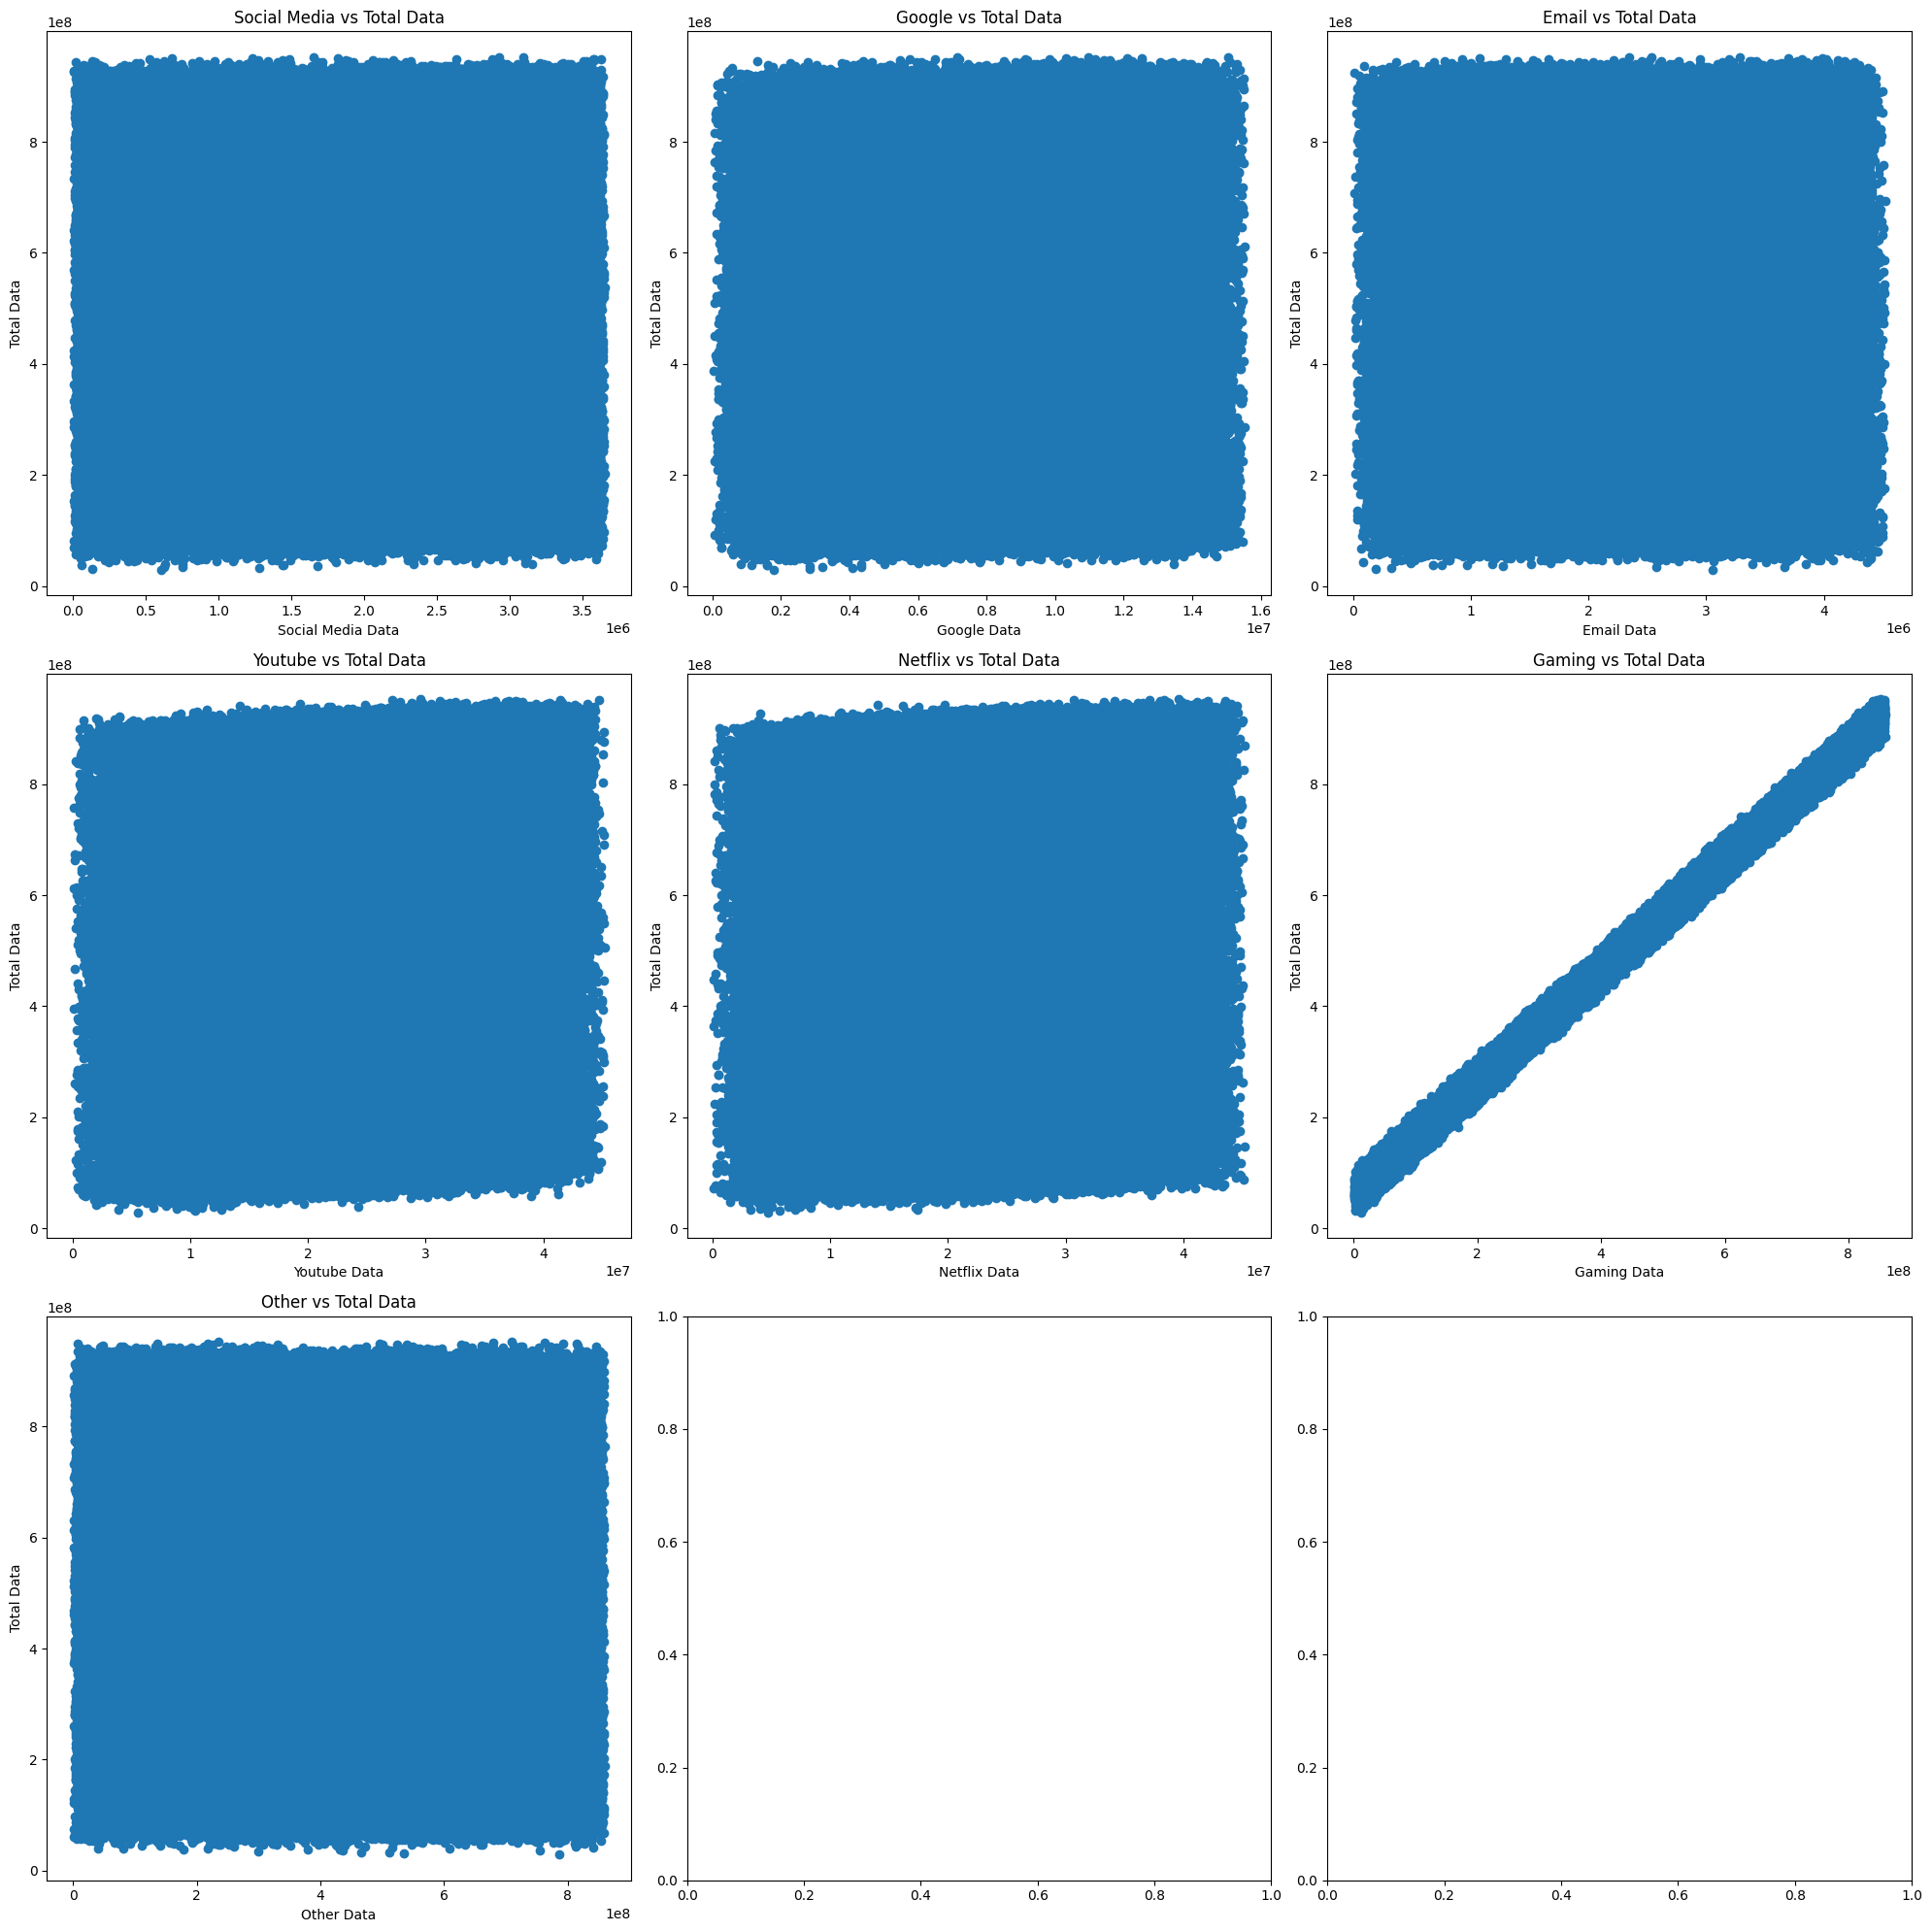


Correlation Analysis:


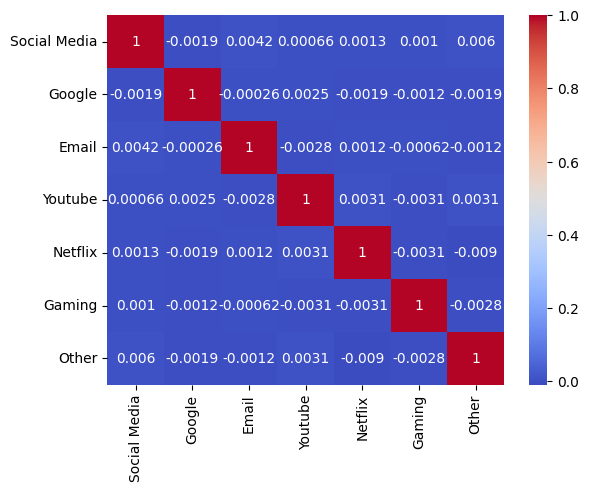

,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
Social Media,1.000000,-0.001892,0.004214,0.000657,0.001272,0.001036,0.005990
Google,-0.001892,1.000000,-0.000265,0.002488,-0.001947,-0.001217,-0.001892
Email,0.004214,-0.000265,1.000000,-0.002848,0.001249,-0.000621,-0.001204
Youtube,0.000657,0.002488,-0.002848,1.000000,0.003066,-0.003060,0.003099
Netflix,0.001272,-0.001947,0.001249,0.003066,1.000000,-0.003140,-0.008977
Gaming,0.001036,-0.001217,-0.000621,-0.003060,-0.003140,1.000000,-0.002784
Other,0.005990,-0.001892,-0.001204,0.003099,-0.008977,-0.002784,1.000000



Univariate Analysis:


c:\Users\Ashis\Desktop\KAIM Program 2\week2\scripts\User_overview_analysis.py:600: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  self.user_aggregates[columns].hist(bins=50, ax=ax)


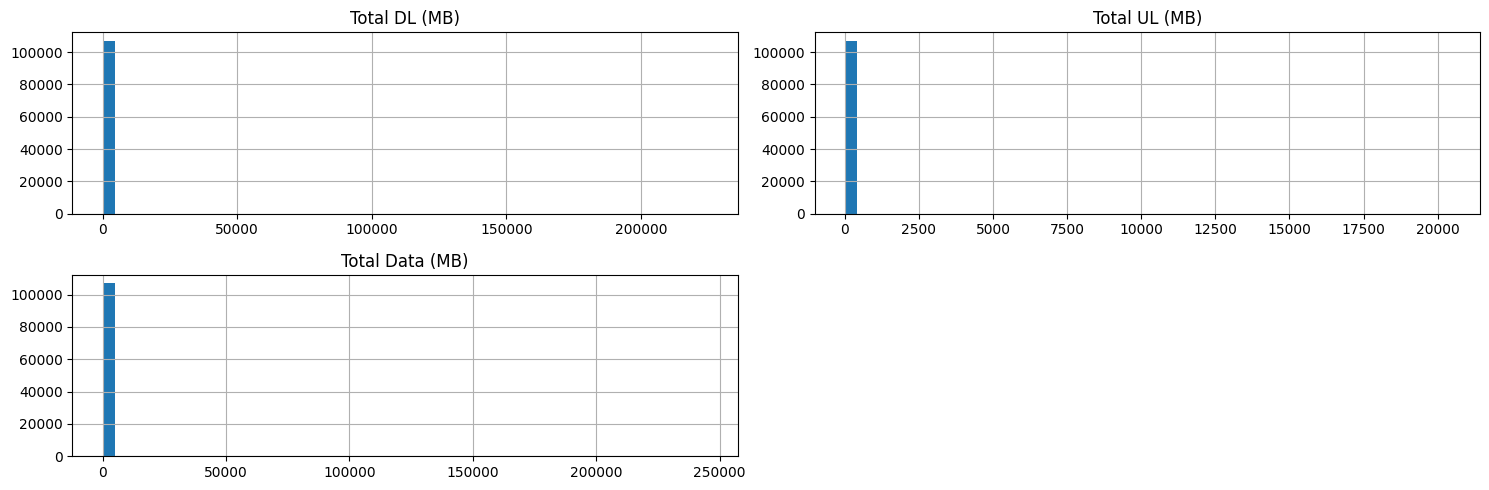

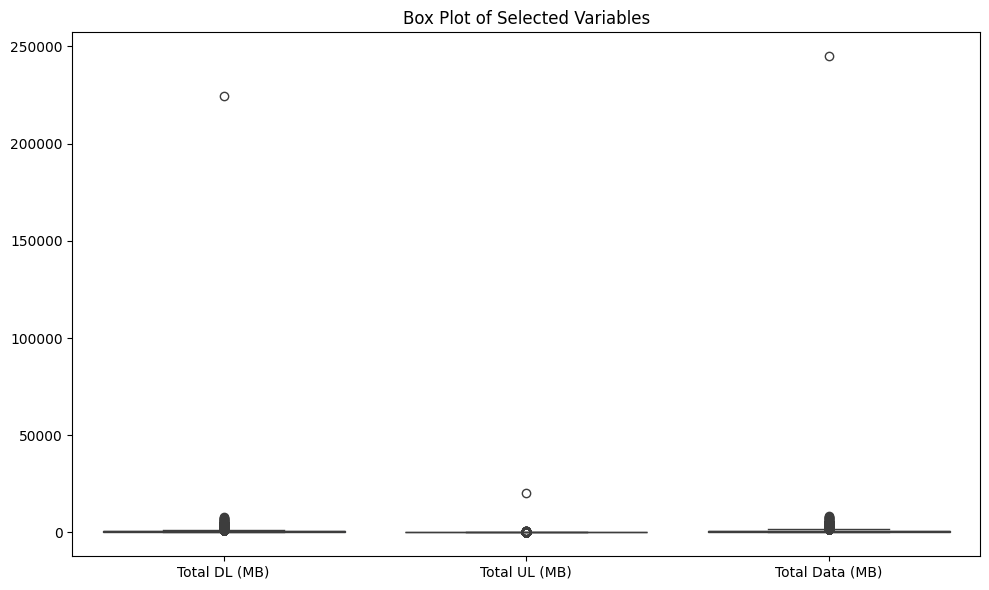


Analyzing Social Media Usage:


AttributeError: 'TelecomDataAnalysis' object has no attribute 'analyze_social_media_usage'

In [5]:
analyzer.run_analysis()